Have fun with the `house.csv` dataset! 

Investigate the features and add them to your modelling to improve the performance 

⚠️ Don't forget to diagnose model performance along the way.

ℹ️ You can download a detailed description of the dataset [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt). Make sure to refer to it throughout the day.

In [105]:
import seaborn as sns

In [1]:
import pandas as pd
import numpy as np
houses = pd.read_csv("../data/houses.csv")
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1760 entries, 0 to 1759
Data columns (total 85 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1760 non-null   int64  
 1   MSSubClass     1760 non-null   int64  
 2   MSZoning       1760 non-null   object 
 3   LotFrontage    1451 non-null   float64
 4   LotArea        1760 non-null   int64  
 5   Street         1760 non-null   object 
 6   Alley          112 non-null    object 
 7   LotShape       1760 non-null   object 
 8   LandContour    1760 non-null   object 
 9   Utilities      1760 non-null   object 
 10  LotConfig      1760 non-null   object 
 11  LandSlope      1760 non-null   object 
 12  Neighborhood   1760 non-null   object 
 13  Condition1     1760 non-null   object 
 14  Condition2     1760 non-null   object 
 15  BldgType       1760 non-null   object 
 16  HouseStyle     1760 non-null   object 
 17  OverallQual    1760 non-null   int64  
 18  OverallC

In [438]:
def convert_elt(k):
    rating = {"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1, "Na":0,"Yes":1,"No":0, "nan":0}
    return rating.get(k,k)

houses.fillna('No', inplace=True)
houses = houses.applymap(convert_elt)


In [439]:
def standardize(s):
    if s.dtype== 'int64' or s.dtype=='float64':
        mu = s.mean()
        sigma = s.std()
        s = (s - mu)/sigma
        return s
    return s

In [440]:
for rep in houses.MSZoning.unique():
    houses[f"MSZoning - {rep}"] = [1 if k==rep else 0 for k in houses2['MSZoning']]
    
for rep in houses.Utilities.unique():
    houses[f"{rep}"] = [1 if k==rep else 0 for k in houses2['Utilities']]    

houses2 = houses.apply(standardize)
houses2.describe()



,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,MoSold,YrSold,SalePrice,MSZoning - RL,MSZoning - RM,MSZoning - C (all),MSZoning - FV,MSZoning - RH,AllPub,NoSeWa
count,1.760000e+03,1.760000e+03,1.760000e+03,1.760000e+03,1.760000e+03,1.760000e+03,1.760000e+03,1.760000e+03,1.760000e+03,1.760000e+03,...,1.760000e+03,1.760000e+03,1.760000e+03,1.760000e+03,1.760000e+03,1.760000e+03,1.760000e+03,1.760000e+03,1.760000e+03,1.760000e+03
mean,6.459479e-17,-5.046468e-17,-7.721096e-17,-3.633457e-17,-2.826022e-16,-1.211152e-16,1.137474e-15,2.971361e-15,4.037175e-17,-3.623364e-16,...,-1.009294e-18,-6.200898e-14,-1.715799e-16,-1.958030e-16,-5.248327e-17,2.119517e-17,2.624164e-17,3.431598e-17,1.616888e-15,-1.009294e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.718711e+00,-8.811116e-01,-1.659531e+00,-9.775330e-01,-3.650738e+00,-4.102465e+00,-3.298457e+00,-1.677589e+00,-5.626200e-01,-2.393467e+00,...,-1.976635e+00,-1.360663e+00,-1.794301e+00,-1.931078e+00,-4.152753e-01,-9.575541e-02,-2.138355e-01,-1.071808e-01,-4.192852e+01,-2.383656e-02
25%,-8.737242e-01,-8.811116e-01,-4.311144e-01,-3.121473e-01,-7.918730e-01,-5.133816e-01,-5.751387e-01,-8.661809e-01,-5.626200e-01,-6.852344e-01,...,-4.951582e-01,-6.111272e-01,-6.377844e-01,5.175512e-01,-4.152753e-01,-9.575541e-02,-2.138355e-01,-1.071808e-01,2.383656e-02,-2.383656e-02
50%,-1.518318e-03,-1.707330e-01,1.402420e-01,-1.070734e-01,-7.715686e-02,-5.133816e-01,5.587406e-02,4.054288e-01,-5.626200e-01,-6.852344e-01,...,-1.247891e-01,1.384086e-01,-2.287429e-01,5.175512e-01,-4.152753e-01,-9.575541e-02,-2.138355e-01,-1.071808e-01,2.383656e-02,-2.383656e-02
75%,8.712793e-01,3.028527e-01,6.258950e-01,1.194577e-01,6.375593e-01,3.838891e-01,9.525763e-01,9.382938e-01,3.208767e-01,1.022999e+00,...,6.159490e-01,8.879444e-01,3.972976e-01,5.175512e-01,-4.152753e-01,-9.575541e-02,-2.138355e-01,-1.071808e-01,2.383656e-02,-2.383656e-02
max,1.734609e+00,3.144367e+00,7.282197e+00,2.166447e+01,2.781708e+00,3.075701e+00,1.284688e+00,1.228947e+00,8.056860e+00,2.731232e+00,...,2.097425e+00,1.637480e+00,6.972092e+00,5.175512e-01,2.406673e+00,1.043734e+01,4.673834e+00,9.324729e+00,2.383656e-02,4.192852e+01


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split


X = houses2[['LotArea','BsmtQual','OverallQual','OverallCond','ExterQual','HeatingQC', \
            'BedroomAbvGr', 'KitchenAbvGr','KitchenQual','PoolArea','GarageCars','GarageQual', \
            'EnclosedPorch', 'MSSubClass','YearBuilt','TotalBsmtSF','1stFlrSF','2ndFlrSF', \
             'GrLivArea', 'TotRmsAbvGrd', 'FullBath','FireplaceQu','Fireplaces', \
            'MSZoning - RM','MSZoning - C (all)','MSZoning - FV','MSZoning - RH', 'AllPub', 'NoSeWa']]
y = houses2['SalePrice']

model = LinearRegression()

b = cross_validate(model, X, y, cv=5)['test_score'].mean()
b

NameError: name 'houses2' is not defined

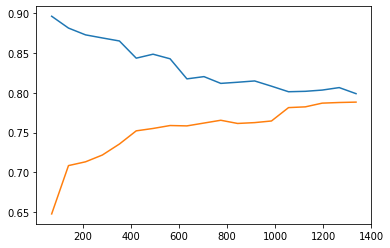

In [349]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_score, test_score = learning_curve(model, X,y, train_sizes = np.arange(0.05,1,0.05), shuffle=True)

train_score_mean = np.mean(train_score, axis = 1)
test_score_mean = np.mean(test_score, axis=1)
plt.plot(train_sizes, train_score_mean)
plt.plot(train_sizes, test_score_mean)


In [3]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

houses3 = houses2.select_dtypes(include=numerics)

corr = houses3.corr()
plt.subplots(figsize=(5,5))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

NameError: name 'houses2' is not defined

In [434]:
corr[['SalePrice']].sort_values('SalePrice')

,SalePrice
MSZoning - RM,-0.275019
KitchenAbvGr,-0.135983
EnclosedPorch,-0.126384
MSZoning - C (all),-0.125178
MSSubClass,-0.087647
OverallCond,-0.077719
MSZoning - RH,-0.066219
Id,-0.026430
MiscVal,-0.021761
YrSold,-0.019229


# 🏁